Algorytm 1D


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:


def simulate_heat_transfer_1D(N, T0, TN, k_values, max_iter=10000, tolerance=0.01):
    """
    Symuluje jednowymiarowy, stacjonarny transfer ciepła metodą różnic skończonych dla materiału niejednorodnego.
    
    Parametry:
    - N: liczba węzłów siatki
    - T0: temperatura na lewym końcu pręta
    - TN: temperatura na prawym końcu pręta
    - k_values: lista współczynników przewodności cieplnej dla każdego węzła
    - max_iter: maksymalna liczba iteracji
    - tolerance: kryterium zbieżności
    
    Zwraca:
    - temperatures: lista temperatur w każdym węźle po zakończeniu iteracji
    - elapsed_time: czas całkowity wykonania obliczeń
    - avg_iteration_time: średni czas jednej iteracji
    - num_iterations: liczba wykonanych iteracji
    """
    # Inicjalizacja temperatury w węzłach
    temperatures = np.zeros(N)
    temperatures[0] = T0  # Warunek brzegowy - lewy koniec
    temperatures[-1] = TN  # Warunek brzegowy - prawy koniec
    
    # Pomiar czasu rozpoczęcia symulacji
    start_time = time.time()
    iteration_times = []  # Lista do przechowywania czasu każdej iteracji

    for iteration in range(max_iter):
        iter_start = time.time()  # Czas rozpoczęcia iteracji
        new_temperatures = temperatures.copy()
        
        # Aktualizacja temperatury w punktach wewnętrznych
        for i in range(1, N - 1):
            k_left = (k_values[i] + k_values[i - 1]) / 2  # Średnie przewodnictwo cieplne na lewo
            k_right = (k_values[i] + k_values[i + 1]) / 2  # Średnie przewodnictwo cieplne na prawo
            
            new_temperatures[i] = (k_right * temperatures[i + 1] + k_left * temperatures[i - 1]) / (k_left + k_right)
        
        # Pomiar czasu iteracji
        iter_time = time.time() - iter_start
        iteration_times.append(iter_time)
        
        # Kryterium zbieżności
        max_difference = np.max(np.abs(new_temperatures - temperatures))
        if max_difference < tolerance:
            temperatures = new_temperatures
            elapsed_time = time.time() - start_time
            avg_iteration_time = sum(iteration_times) / len(iteration_times)
            return temperatures, elapsed_time, avg_iteration_time, iteration + 1
        
        temperatures = new_temperatures
    
    elapsed_time = time.time() - start_time
    avg_iteration_time = sum(iteration_times) / len(iteration_times)
    return temperatures, elapsed_time, avg_iteration_time, max_iter

In [3]:

def plot_temperature_distribution_1D(temperatures):
    """
    Rysuje wykres rozkładu temperatury w pręcie.
    
    Parametry:
    - temperatures: lista temperatur w każdym węźle
    """
    plt.figure(figsize=(8, 5))
    plt.plot(range(len(temperatures)), temperatures, marker='o', linestyle='-')
    plt.xlabel("Numer węzła")
    plt.ylabel("Temperatura [°C]")
    plt.title("Rozkład temperatury w pręcie")
    plt.grid(True)
    plt.show()

In [4]:

# Parametry testowe
N = 50  # Liczba węzłów siatki
T0 = 150  # Temperatura na lewym końcu [°C]
TN = 50  # Temperatura na prawym końcu [°C]
k_al = 237.0  # Przewodnictwo cieplne aluminium
k_wood = 0.12  # Przewodnictwo cieplne drewna
x_interface = N // 2  # Punkt podziału pręta
k_values = np.array([k_al] * x_interface + [k_wood] * (N - x_interface))



Symulacja zakończona po 2122 iteracjach.
Czas wykonania: 0.1246 sekundy
Średni czas pojedynczej iteracji: 0.000046 sekundy


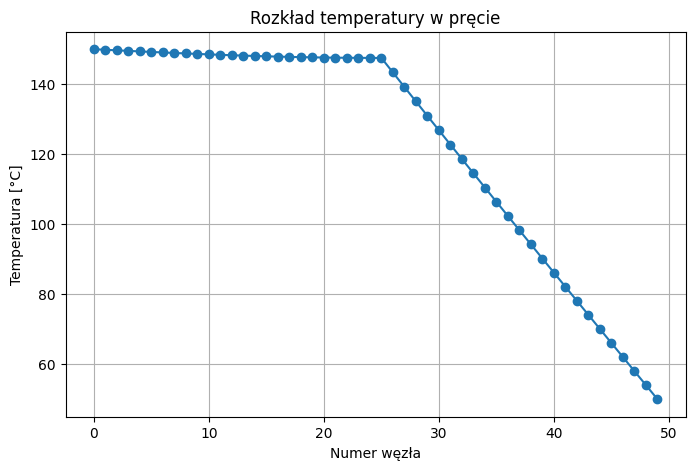

In [5]:
# Uruchomienie symulacji
temperatures, elapsed_time, avg_iteration_time, num_iterations = simulate_heat_transfer_1D(N, T0, TN, k_values)

# Wyświetlenie wyników
print(f"Symulacja zakończona po {num_iterations} iteracjach.")
print(f"Czas wykonania: {elapsed_time:.4f} sekundy")
print(f"Średni czas pojedynczej iteracji: {avg_iteration_time:.6f} sekundy")

# Wizualizacja wyników
plot_temperature_distribution_1D(temperatures)

Algorytm 2D


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import time
def simulate_heat_transfer_nonhomogeneous1D(N, T0, TN, k_values, max_iter=10000, tolerance=0.01):
    """
    Symuluje jednowymiarowy, stacjonarny transfer ciepła metodą różnic skończonych dla materiału niejednorodnego.
    
    Parametry:
    - N: liczba węzłów siatki
    - T0: temperatura na lewym końcu pręta
    - TN: temperatura na prawym końcu pręta
    - k_values: lista współczynników przewodności cieplnej dla każdego węzła
    - max_iter: maksymalna liczba iteracji
    - tolerance: kryterium zbieżności
    
    Zwraca:
    - temperatures: lista temperatur w każdym węźle po zakończeniu iteracji
    - num_iterations: liczba wykonanych iteracji do osiągnięcia tolerancji
    """
    temperatures = np.zeros(N)
    temperatures[0] = T0  
    temperatures[-1] = TN  
    
    for iteration in range(max_iter):
        new_temperatures = temperatures.copy()
        for i in range(1, N - 1):
            k_left = (k_values[i] + k_values[i - 1]) / 2  
            k_right = (k_values[i] + k_values[i + 1]) / 2  
            new_temperatures[i] = (k_right * temperatures[i + 1] + k_left * temperatures[i - 1]) / (k_left + k_right)
        
        if np.max(np.abs(new_temperatures - temperatures)) < tolerance:
            return new_temperatures, iteration + 1  # Zwracamy temperatury oraz liczbę iteracji

        temperatures = new_temperatures
    
    return temperatures, max_iter  # Jeśli nie osiągnie zbieżności, zwracamy maksymalną liczbę iteracji


In [7]:
def simulate_heat_transfer_nonhomogeneous2D(Nx, Ny, TU, TD, TL, TR, k_values, max_iter=10000, tolerance=0.01):
    """
    Symuluje dwuwymiarowy, stacjonarny transfer ciepła metodą różnic skończonych dla materiału niejednorodnego.
    
    Parametry:
    - Nx, Ny: liczba węzłów siatki w kierunku X i Y
    - TU, TD, TL, TR: temperatury na brzegach
    - k_values: macierz współczynników przewodności cieplnej
    - max_iter: maksymalna liczba iteracji
    - tolerance: kryterium zbieżności
    
    Zwraca:
    - temperatures: macierz temperatur w każdym węźle
    """
    temperatures = np.zeros((Ny, Nx))
    temperatures[0, :] = TU  
    temperatures[-1, :] = TD 
    temperatures[:, 0] = TL  
    temperatures[:, -1] = TR 
    
    for iteration in range(max_iter):
        new_temperatures = temperatures.copy()
        for i in range(1, Ny - 1):
            for j in range(1, Nx - 1):
                k_x_left = (k_values[i, j] + k_values[i, j - 1]) / 2
                k_x_right = (k_values[i, j] + k_values[i, j + 1]) / 2
                k_y_up = (k_values[i, j] + k_values[i - 1, j]) / 2
                k_y_down = (k_values[i, j] + k_values[i + 1, j]) / 2
                
                new_temperatures[i, j] = (
                    k_x_right * temperatures[i, j + 1] + k_x_left * temperatures[i, j - 1] +
                    k_y_up * temperatures[i - 1, j] + k_y_down * temperatures[i + 1, j]
                ) / (k_x_left + k_x_right + k_y_up + k_y_down)
        
        if np.max(np.abs(new_temperatures - temperatures)) < tolerance:
            return new_temperatures
        temperatures = new_temperatures
    
    return temperatures


In [8]:

def plot_temperature_distribution_2D(temperatures):
    """
    Rysuje mapę cieplną rozkładu temperatury w materiale 2D.
    """
    plt.figure(figsize=(8, 6))
    plt.imshow(temperatures, cmap='hot', interpolation='nearest')
    plt.colorbar(label='Temperatura [°C]')
    plt.title("Rozkład temperatury w materiale")
    plt.xlabel("Indeks X")
    plt.ylabel("Indeks Y")
    plt.show()


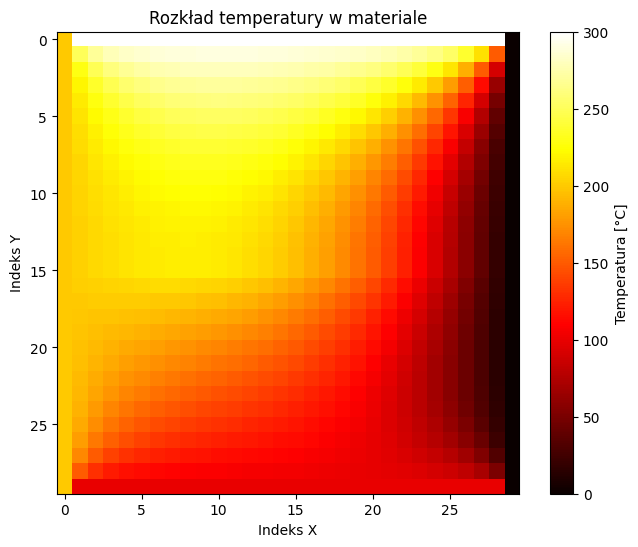

In [9]:

# Parametry testowe 2D
Nx, Ny = 30, 30

kal, kw = 237.0, 0.12
TU, TD, TL, TR = 300, 100, 200, 0
k_values_2D = np.ones((Ny, Nx)) * kal
k_values_2D[Ny//2:, :] = kw

temperatures_2D = simulate_heat_transfer_nonhomogeneous2D(Nx, Ny, TU, TD, TL, TR, k_values_2D)

# Wizualizacja wyników
plot_temperature_distribution_2D(temperatures_2D)

Zadanie 1

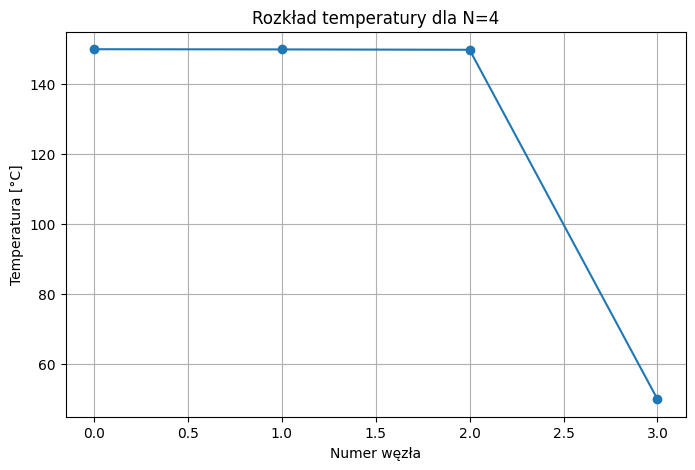

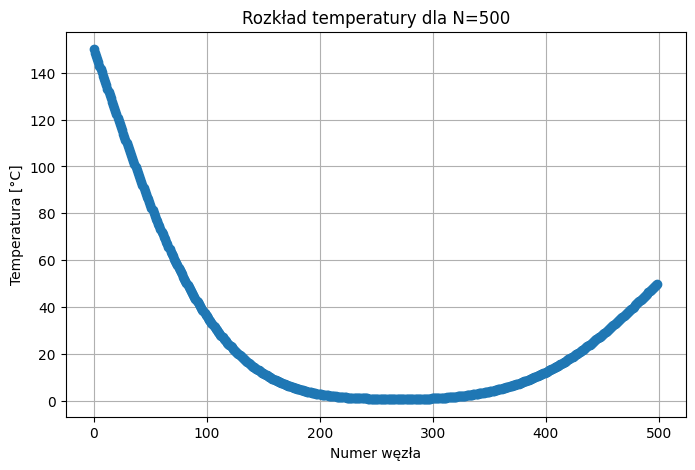

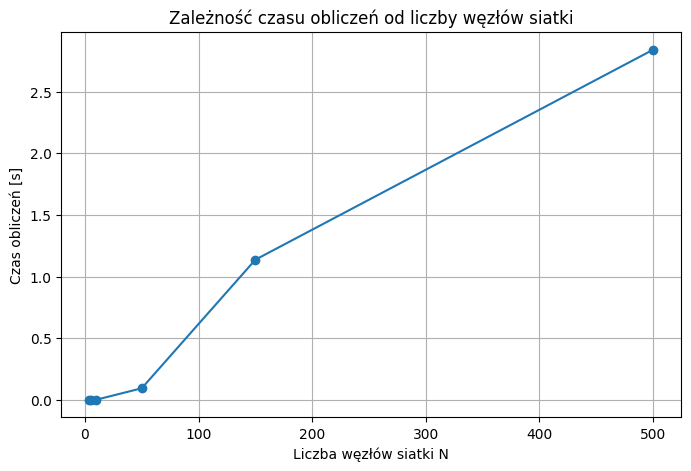


Tabela wyników testów gęstości siatki:
 Ilość węzłów siatki N  Całkowity czas obliczeń [s]  Liczba iteracji
                     4                     0.001251               19
                     5                     0.001004               19
                    10                     0.000997              126
                    50                     0.093939             2122
                   150                     1.136732             9622
                   500                     2.840065             7260


In [52]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd

# Funkcja do symulacji 1D (już zdefiniowana w kodzie)
def run_test_1D():
    grid_sizes = [4, 5, 10, 50, 150, 500]  # Ilość węzłów siatki
    T0, TN = 150, 50  # Warunki brzegowe
    kal, kw = 237.0, 0.12  # Współczynniki przewodnictwa cieplnego
    max_iter = 10000  # Maksymalna liczba iteracji

    results = []

    for N in grid_sizes:
        x_interface = N // 2  # Podział na dwa materiały
        k_values = np.array([kal] * x_interface + [kw] * (N - x_interface))

        start_time = time.time()
        
        # Teraz funkcja zwraca temperatury oraz liczbę iteracji
        temperatures, num_iterations = simulate_heat_transfer_nonhomogeneous1D(N, T0, TN, k_values, max_iter=max_iter)
        
        elapsed_time = time.time() - start_time
        results.append((N, elapsed_time, num_iterations))

        # Zapisywanie wyników dla pierwszej i ostatniej wartości siatki (N=4 i N=500)
        if N == 4 or N == 500:
            plt.figure(figsize=(8, 5))
            plt.plot(range(N), temperatures, marker='o', linestyle='-')
            plt.xlabel("Numer węzła")
            plt.ylabel("Temperatura [°C]")
            plt.title(f"Rozkład temperatury dla N={N}")
            plt.grid(True)
            plt.show()

    # Tworzenie wykresu zależności czasu od liczby węzłów siatki
    sizes, times, iterations = zip(*results)
    plt.figure(figsize=(8, 5))
    plt.plot(sizes, times, marker='o', linestyle='-')
    plt.xlabel("Liczba węzłów siatki N")
    plt.ylabel("Czas obliczeń [s]")
    plt.title("Zależność czasu obliczeń od liczby węzłów siatki")
    plt.grid(True)
    plt.show()

    # Tworzenie tabeli wyników
    df_results = pd.DataFrame(results, columns=["Ilość węzłów siatki N", "Całkowity czas obliczeń [s]", "Liczba iteracji"])

    # Wyświetlenie tabeli wyników w formie czytelnej w terminalu
    print("\nTabela wyników testów gęstości siatki:")
    print(df_results.to_string(index=False))

    return df_results

# Uruchomienie testu
df_test_results_1D = run_test_1D()


Na podstawie przeprowadzonych testów można zauważyć, że zwiększenie liczby węzłów siatki (N) znacząco wpływa na czas obliczeń.

Dla małych wartości N (4, 5, 10) czas obliczeń jest niemal zerowy.

Dla większych wartości N (50, 150, 500) czas obliczeń rośnie wykładniczo.


Pierwszy wykres (N=4) – dla bardzo małej liczby węzłów temperatura zmienia się skokowo i nie daje dokładnych wyników.

Drugi wykres (N=500) – dla dużej liczby węzłów rozkład temperatury jest znacznie bardziej dokładny i płynny.

Trzeci wykres (czas obliczeń vs. N) – wzrost czasu obliczeń wraz z liczbą węzłów jest niemal liniowy w zakresie większych wartości N, ale dla bardzo małych N efekty numeryczne mogą powodować nieregularności.

Zwiększenie liczby węzłów poprawia dokładność rozwiązania, ale znacząco zwiększa koszt obliczeniowy. Optymalny wybór liczby węzłów siatki zależy od kompromisu pomiędzy dokładnością rozwiązania a czasem obliczeń.

Zadanie 2

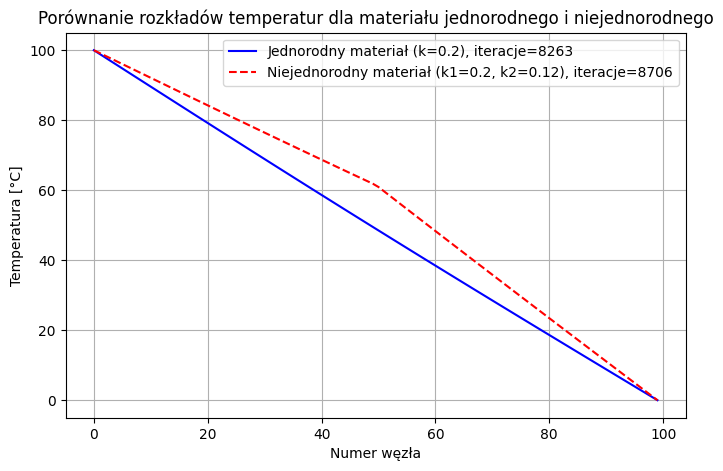

Liczba iteracji dla materiału jednorodnego: 8263
Liczba iteracji dla materiału niejednorodnego: 8706


In [53]:

# Parametry symulacji
N = 100
T_left, T_right = 100, 0
max_iter = 10000
tolerance = 0.001

# Jednorodny przypadek (stałe przewodnictwo)
k_homogeneous = np.ones(N) * 0.2

# Niejednorodny przypadek (połowa pręta ma k1, druga połowa k2)
k_heterogeneous = np.ones(N)
k_heterogeneous[:N//2] = 0.2  # Po lewej k1
k_heterogeneous[N//2:] = 0.12  # Po prawej k2

# Obliczenie temperatur i liczby iteracji
temperatures_homogeneous, num_iterations_homogeneous = simulate_heat_transfer_nonhomogeneous1D(N, T_left, T_right, k_homogeneous, max_iter, tolerance)
temperatures_heterogeneous, num_iterations_heterogeneous = simulate_heat_transfer_nonhomogeneous1D(N, T_left, T_right, k_heterogeneous, max_iter, tolerance)

# Wykres porównawczy
plt.figure(figsize=(8, 5))
plt.plot(range(N), temperatures_homogeneous, label=f"Jednorodny materiał (k=0.2), iteracje={num_iterations_homogeneous}", color='blue')
plt.plot(range(N), temperatures_heterogeneous, label=f"Niejednorodny materiał (k1=0.2, k2=0.12), iteracje={num_iterations_heterogeneous}", color='red', linestyle='--')
plt.xlabel("Numer węzła")
plt.ylabel("Temperatura [°C]")
plt.title("Porównanie rozkładów temperatur dla materiału jednorodnego i niejednorodnego")
plt.legend()
plt.grid(True)
plt.show()

# Wyświetlenie liczby iteracji dla obu przypadków
print(f"Liczba iteracji dla materiału jednorodnego: {num_iterations_homogeneous}")
print(f"Liczba iteracji dla materiału niejednorodnego: {num_iterations_heterogeneous}")


Zadanie 3

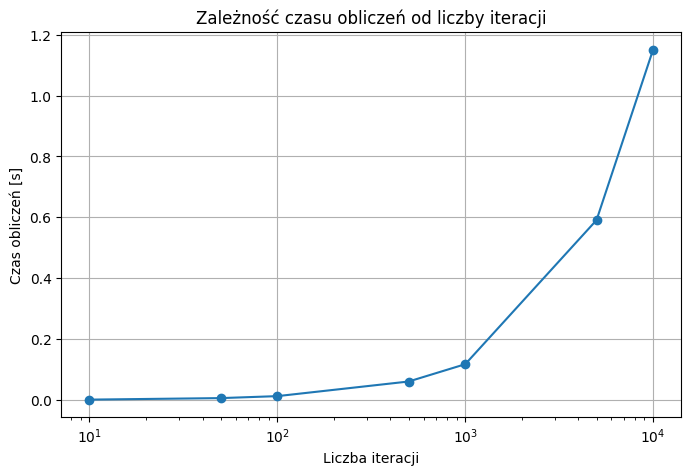


Tabela wyników testów wpływu liczby kroków iteracyjnych:
 Ilość kroków  Całkowity czas obliczeń [s]
           10                     0.001004
           50                     0.005996
          100                     0.012473
          500                     0.060517
         1000                     0.117315
         5000                     0.590725
        10000                     1.150725


In [54]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd

# Parametry symulacji
N = 150  # Stała liczba węzłów siatki
T_left, T_right = 100, 0  # Warunki brzegowe
k_value = 0.2  # Jednorodny materiał
tolerance = 0.001

# Lista liczby iteracji do przetestowania
iterations_list = [10, 50, 100, 500, 1000, 5000, 10000]

# Macierz współczynnika przewodnictwa cieplnego (stałe k)
k_homogeneous = np.ones(N) * k_value

# Lista do przechowywania wyników
results = []

# Wykonanie testów dla różnych wartości max_iter
for max_iter in iterations_list:
    start_time = time.time()
    temperatures = simulate_heat_transfer_nonhomogeneous1D(N, T_left, T_right, k_homogeneous, max_iter, tolerance)
    elapsed_time = time.time() - start_time

    results.append((max_iter, elapsed_time))

# Tworzenie wykresu zależności czasu obliczeń od liczby iteracji
iterations, times = zip(*results)
plt.figure(figsize=(8, 5))
plt.plot(iterations, times, marker='o', linestyle='-')
plt.xlabel("Liczba iteracji")
plt.ylabel("Czas obliczeń [s]")
plt.title("Zależność czasu obliczeń od liczby iteracji")
plt.xscale("log")  # Skala logarytmiczna dla lepszej czytelności
plt.grid(True)
plt.show()

# Tworzenie tabeli wyników
df_results = pd.DataFrame(results, columns=["Ilość kroków", "Całkowity czas obliczeń [s]"])

# Wyświetlenie wyników w czytelnej formie
print("\nTabela wyników testów wpływu liczby kroków iteracyjnych:")
print(df_results.to_string(index=False))


Z wykresu oraz wyników tabelarycznych wynika, że czas obliczeń rośnie niemal liniowo wraz ze wzrostem liczby iteracji.

Dla małych wartości iteracji (10, 50, 100) czas obliczeń jest bardzo niski, prawie niezauważalny.

Dla większych wartości iteracji (1000, 5000, 10000) czas obliczeń rośnie w sposób bliski liniowemu.

Skala logarytmiczna wykresu pozwala zobaczyć, że wzrost nie jest idealnie liniowy, ale w zakresie większych wartości iteracji przybliża się do tego charakteru.

Analiza wykresu sugeruje, że czas obliczeń jest wprost proporcjonalny do liczby iteracji, co oznacza zależność liniową

Zadanie 4

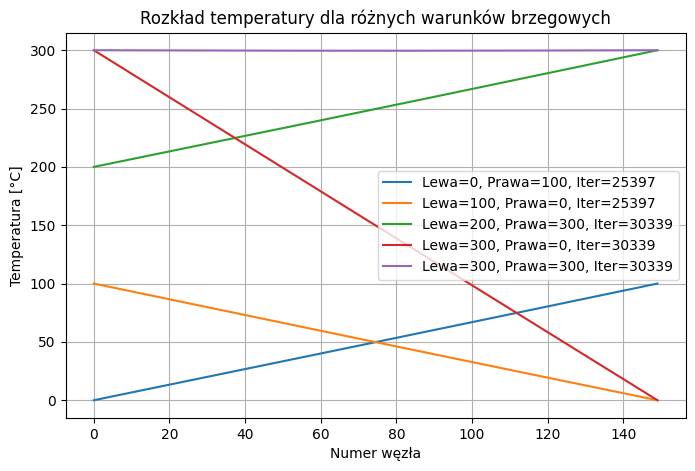


Tabela wyników wpływu warunków brzegowych na rozkład temperatury:
 Lewa strona  Prawa strona  Ilość iteracji
           0           100           25397
         100             0           25397
         200           300           30339
         300             0           30339
         300           300           30339


In [55]:

# Parametry symulacji
N = 150  # Stała liczba węzłów siatki
max_iter = 100000
tolerance = 0.0001
k_value = 0.2  # Jednorodny materiał

# Warunki brzegowe do testów
boundary_conditions = [
    (0, 100),
    (100, 0),
    (200, 300),
    (300, 0),
    (300, 300)
]

# Macierz współczynnika przewodnictwa cieplnego (stałe k)
k_homogeneous = np.ones(N) * k_value

# Lista do przechowywania wyników
results = []

# Wykonanie testów dla różnych warunków brzegowych
plt.figure(figsize=(8, 5))

for T_left, T_right in boundary_conditions:
    # Uruchomienie symulacji
    temperatures, num_iterations = simulate_heat_transfer_nonhomogeneous1D(N, T_left, T_right, k_homogeneous, max_iter, tolerance)

    results.append((T_left, T_right, num_iterations))

    # Rysowanie wykresu temperatury dla różnych warunków brzegowych
    plt.plot(range(N), temperatures, label=f"Lewa={T_left}, Prawa={T_right}, Iter={num_iterations}")

plt.xlabel("Numer węzła")
plt.ylabel("Temperatura [°C]")
plt.title("Rozkład temperatury dla różnych warunków brzegowych")
plt.legend()
plt.grid(True)
plt.show()

# Tworzenie tabeli wyników
df_results = pd.DataFrame(results, columns=["Lewa strona", "Prawa strona", "Ilość iteracji"])

# Wyświetlenie wyników w czytelnej formie
print("\nTabela wyników wpływu warunków brzegowych na rozkład temperatury:")
print(df_results.to_string(index=False))


Różnica temperatur na końcach pręta determinuje kształt rozkładu temperatury.

Jeśli warunki brzegowe są symetryczne (np. 300-300), to rozkład temperatury jest niemal płaski.

Jeśli jeden koniec jest gorący, a drugi zimny (np. 0-100, 300-0), rozkład temperatury ma bardziej liniowy przebieg.

Gradient temperatury zależy od różnicy między warunkami brzegowymi – im większa różnica, tym bardziej stromy wykres.


Dla przypadków (0-100) i (100-0) liczba iteracji była mniejsza (25397 iteracji) – oznacza to, że system szybciej osiągał stan równowagi.

Dla przypadków (200-300), (300-0) i (300-300) liczba iteracji była większa (30339 iteracji) – co sugeruje, że bardziej "ekstremalne" warunki brzegowe mogą wymagać więcej iteracji.

Przypadek (300-300) osiągnął stabilizację w tylu samo iteracjach co przypadek (300-0), co sugeruje, że duże temperatury mogą powodować wolniejszą stabilizację.

Zadanie 5

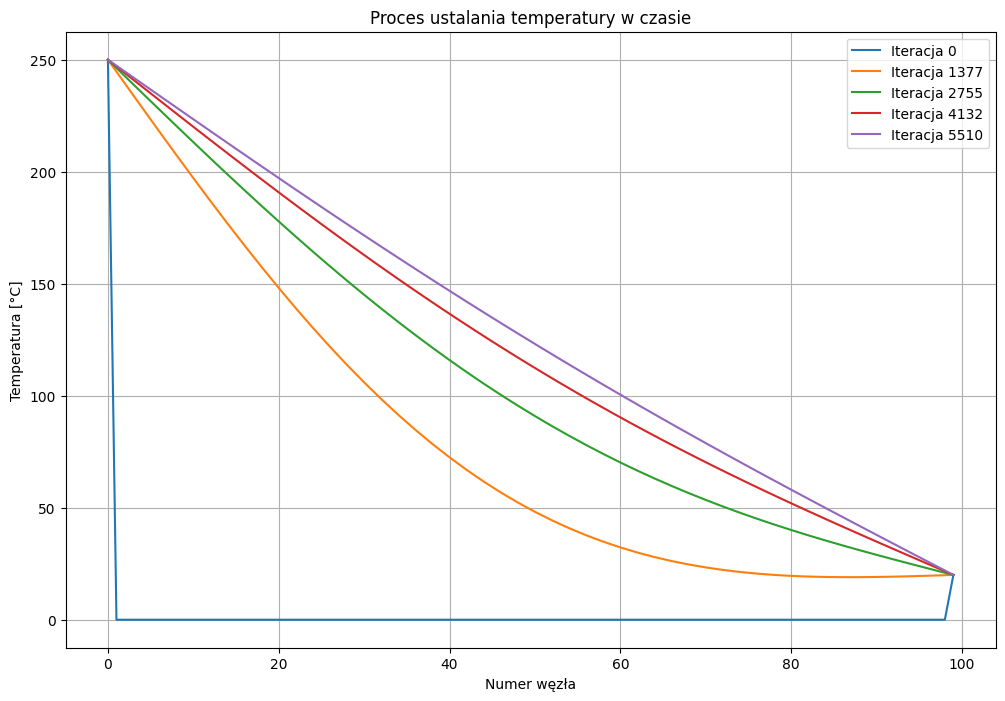

Liczba iteracji do osiągnięcia stabilizacji: 5510


In [ ]:

# Parametry symulacji
N = 100  # Liczba węzłów siatki
T_left, T_right = 250, 20  # Warunki brzegowe
max_iter = 10000  # Maksymalna liczba iteracji


# Jednorodny materiał o stałym współczynniku przewodnictwa
k_homogeneous = np.ones(N) * 0.2

# Uruchomienie symulacji i zapis kolejnych temperatur
temperatures, num_iterations = simulate_heat_transfer_nonhomogeneous1D(N, T_left, T_right, k_homogeneous, max_iter)

# Podział liczby iteracji na 5 równych części do wizualizacji procesu ustalania temperatury
checkpoints = np.linspace(0, num_iterations, 5, dtype=int)

# Rysowanie wykresów dla wybranych iteracji
plt.figure(figsize=(12, 8))

for i, checkpoint in enumerate(checkpoints):
    # Ponowna symulacja z zatrzymaniem na danym etapie iteracji
    temperatures_partial, _ = simulate_heat_transfer_nonhomogeneous1D(N, T_left, T_right, k_homogeneous, checkpoint)
    
    plt.plot(range(N), temperatures_partial, label=f"Iteracja {checkpoint}")

plt.xlabel("Numer węzła")
plt.ylabel("Temperatura [°C]")
plt.title("Proces ustalania temperatury w czasie")
plt.legend()
plt.grid(True)
plt.show()

# Wyświetlenie informacji o liczbie iteracji do osiągnięcia stabilizacji
print(f"Liczba iteracji do osiągnięcia stabilizacji: {num_iterations}")


Analizując krzywe temperatury dla różnych iteracji, możemy wyróżnić kilka faz procesu zmian temperatury

1/5 Iteracji: 
Gradient temperatury jest ekstremalnie stromy na początku, co oznacza, że w pierwszych iteracjach dochodzi do największych zmian.

2/5 Iteracji:
Temperatura w środkowej części pręta szybko rośnie, ponieważ różnice temperatur są duże i ciepło przepływa intensywnie.
Krzywa temperatury zaczyna przybierać charakterystyczny, nieliniowy kształt – oznacza to, że początkowe warunki nie są jeszcze w równowadze.

3/5 Iteracji
Zmiany temperatury są coraz mniejsze, ponieważ pręt zaczyna zbliżać się do równowagi termicznej.
Widać, że środkowa część pręta osiąga coraz bardziej stabilną temperaturę, ale nadal dochodzi do pewnych fluktuacji.

4/5 Iteracji
Krzywa temperatury jest niemal liniowa, co oznacza, że gradient ciepła wzdłuż pręta jest już stały.
Jedyną różnicą względem stanu ustalonego jest to, że minimalne różnice jeszcze występują, ale są już bardzo małe.

5/5 Iteracji 
Temperatura w każdym punkcie pręta przestaje się zmieniać – oznacza to osiągnięcie pełnej stabilizacji.
Krzywa temperatury staje się idealnie gładka i liniowa, ponieważ rozprzestrzenianie ciepła zostało zakończone.

Zadanie 6

Rozpoczynanie testów dla różnych rozmiarów siatki 2D...


Postęp symulacji:   0%|          | 0/6 [00:00<?, ?test/s]

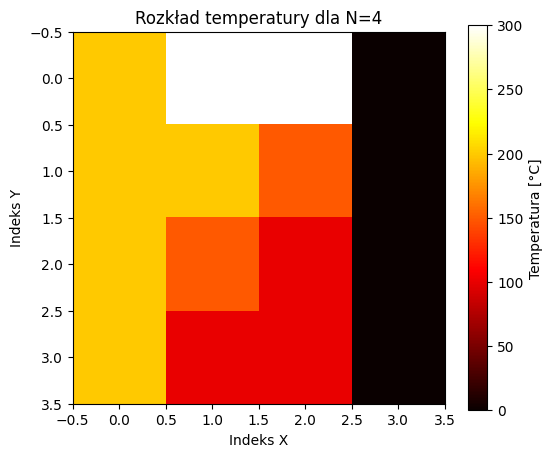

Postęp symulacji:  83%|████████▎ | 5/6 [00:44<00:11, 11.97s/test]

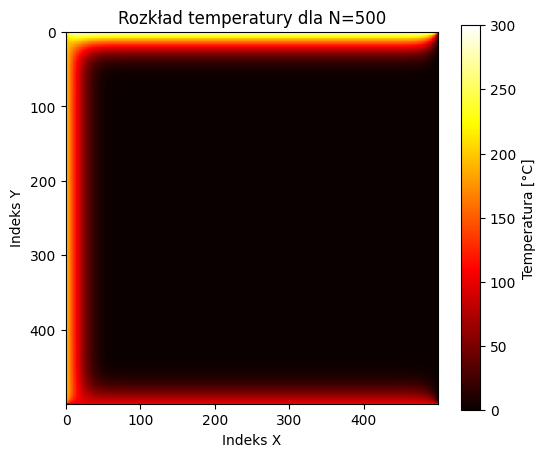

Postęp symulacji: 100%|██████████| 6/6 [08:25<00:00, 84.29s/test] 

Symulacje zakończone. Generowanie wykresów...


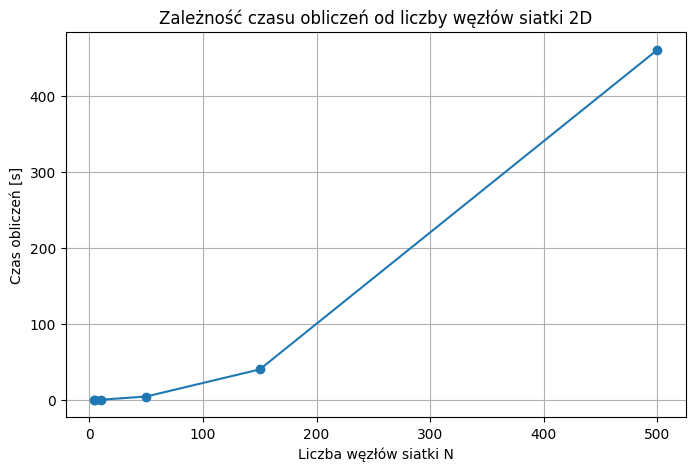


Tabela wyników testów gęstości siatki w 2D:
 Ilość węzłów siatki N  Całkowity czas obliczeń [s]
                     4                     0.000000
                     5                     0.001136
                    10                     0.019812
                    50                     4.193053
                   150                    39.957016
                   500                   461.372268


In [59]:

from tqdm import tqdm  # Biblioteka do wyświetlania paska postępu

# Funkcja do symulacji 2D z wyświetlaniem progressu
def run_test_2D():
    grid_sizes = [4, 5, 10, 50, 150, 500]  # Ilość węzłów siatki w obu wymiarach
    TU, TD, TL, TR = 300, 100, 200, 0  # Warunki brzegowe
    kal = 237.0  # Przewodność cieplna
    max_iter = 1000  # Maksymalna liczba iteracji

    results = []

    print("Rozpoczynanie testów dla różnych rozmiarów siatki 2D...")

    for N in tqdm(grid_sizes, desc="Postęp symulacji", unit="test"):
        # Tworzenie jednorodnej siatki przewodnictwa cieplnego
        k_values_2D = np.ones((N, N)) * kal
        
        # Pomiar czasu wykonania
        start_time = time.time()
        temperatures = simulate_heat_transfer_nonhomogeneous2D(N, N, TU, TD, TL, TR, k_values_2D, max_iter)
        elapsed_time = time.time() - start_time

        results.append((N, elapsed_time))

        # Zapisywanie wyników dla pierwszej i ostatniej wartości siatki (N=4 i N=500)
        if N == 4 or N == 500:
            plt.figure(figsize=(6, 5))
            plt.imshow(temperatures, cmap='hot', interpolation='nearest')
            plt.colorbar(label='Temperatura [°C]')
            plt.title(f"Rozkład temperatury dla N={N}")
            plt.xlabel("Indeks X")
            plt.ylabel("Indeks Y")
            plt.show()

    print("Symulacje zakończone. Generowanie wykresów...")

    # Tworzenie wykresu zależności czasu od liczby węzłów siatki
    sizes, times = zip(*results)
    plt.figure(figsize=(8, 5))
    plt.plot(sizes, times, marker='o', linestyle='-')
    plt.xlabel("Liczba węzłów siatki N")
    plt.ylabel("Czas obliczeń [s]")
    plt.title("Zależność czasu obliczeń od liczby węzłów siatki 2D")
    plt.grid(True)
    plt.show()

    # Tworzenie tabeli wyników
    df_results = pd.DataFrame(results, columns=["Ilość węzłów siatki N", "Całkowity czas obliczeń [s]"])

    # Wyświetlenie tabeli wyników w formie czytelnej w terminalu
    print("\nTabela wyników testów gęstości siatki w 2D:")
    print(df_results.to_string(index=False))

    return df_results

# Uruchomienie testu
df_test_results_2D = run_test_2D()


Czas obliczeń rośnie w sposób wykładniczy wraz ze wzrostem liczby węzłów siatki (N).

Dla małych wartości N (np. 4, 5, 10) obliczenia są prawie natychmiastowe, ale dokładność rozwiązania jest niska.

Dla większych wartości N (np. 150, 500) obliczenia trwają znacznie dłużej, ale rozkład temperatury jest dokładniejszy.

Wzrost z 10 do 50 węzłów powoduje skokowy wzrost czasu obliczeń (~4 s), a przejście do 500 węzłów powoduje wzrost do ponad 460 sekund.

Zadanie 7

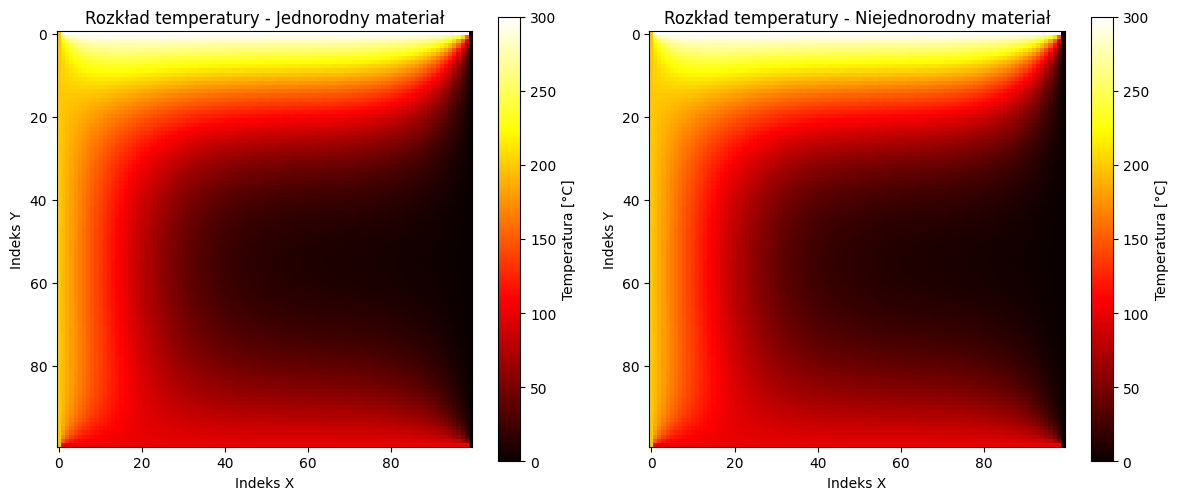

In [61]:
import numpy as np
import matplotlib.pyplot as plt

# Parametry symulacji
Nx, Ny = 100, 100  # Rozmiar siatki
TU, TD, TL, TR = 300, 100, 200, 0  # Warunki brzegowe
max_iter = 1000  # Maksymalna liczba iteracji
tolerance = 0.001  # Kryterium zbieżności

# Definiowanie jednorodnej i niejednorodnej przewodności cieplnej
k_homogeneous = np.ones((Ny, Nx)) * 0.2  # Stała przewodność cieplna

k_heterogeneous = np.ones((Ny, Nx))
k_heterogeneous[:, :Nx//2] = 0.2  # Lewa połowa siatki ma k1
k_heterogeneous[:, Nx//2:] = 0.12  # Prawa połowa siatki ma k2

# Obliczenie temperatury dla jednorodnego materiału
temperatures_homogeneous = simulate_heat_transfer_nonhomogeneous2D(Nx, Ny, TU, TD, TL, TR, k_homogeneous, max_iter, tolerance)

# Obliczenie temperatury dla niejednorodnego materiału
temperatures_heterogeneous = simulate_heat_transfer_nonhomogeneous2D(Nx, Ny, TU, TD, TL, TR, k_heterogeneous, max_iter, tolerance)

# Wizualizacja porównawcza rozkładów temperatury
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Jednorodny przypadek
im1 = axes[0].imshow(temperatures_homogeneous, cmap='hot', interpolation='nearest')
axes[0].set_title("Rozkład temperatury - Jednorodny materiał")
axes[0].set_xlabel("Indeks X")
axes[0].set_ylabel("Indeks Y")
plt.colorbar(im1, ax=axes[0], label="Temperatura [°C]")

# Niejednorodny przypadek
im2 = axes[1].imshow(temperatures_heterogeneous, cmap='hot', interpolation='nearest')
axes[1].set_title("Rozkład temperatury - Niejednorodny materiał")
axes[1].set_xlabel("Indeks X")
axes[1].set_ylabel("Indeks Y")
plt.colorbar(im2, ax=axes[1], label="Temperatura [°C]")

plt.tight_layout()
plt.show()


Zadanie 8

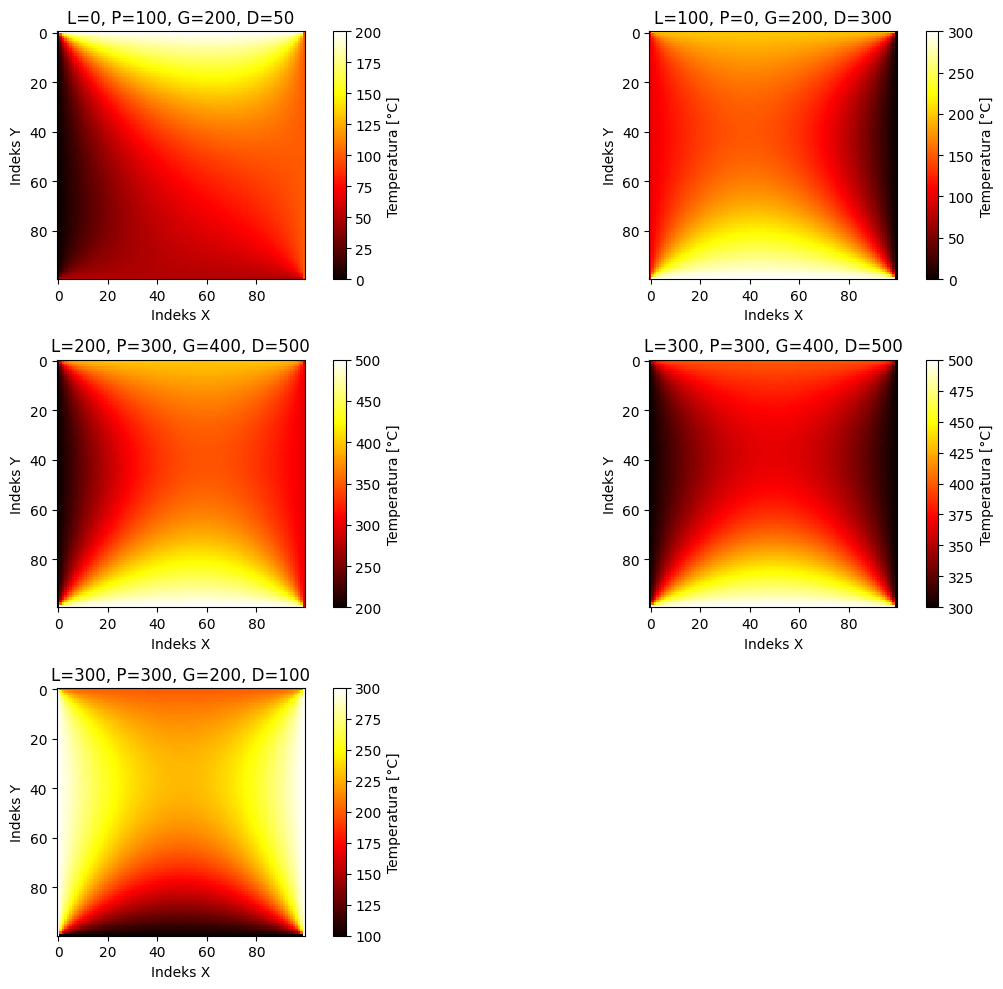


Tabela wyników wpływu warunków brzegowych na rozkład temperatury:
 Lewa strona  Prawa strona  Góra  Dół
           0           100   200   50
         100             0   200  300
         200           300   400  500
         300           300   400  500
         300           300   200  100


In [62]:

import pandas as pd

# Stałe parametry symulacji
Nx, Ny = 100, 100  # Rozmiar siatki
max_iter = 10000  # Maksymalna liczba iteracji
tolerance = 0.001  # Kryterium zbieżności
kal = 237.0  # Przewodność cieplna (stała dla wszystkich przypadków)

# Lista warunków brzegowych do testów
boundary_conditions = [
    (0, 100, 200, 50),
    (100, 0, 200, 300),
    (200, 300, 400, 500),
    (300, 300, 400, 500),
    (300, 300, 200, 100)
]

# Lista do przechowywania wyników
results = []

# Wykonanie testów dla różnych warunków brzegowych
plt.figure(figsize=(12, 10))

for i, (TL, TR, TU, TD) in enumerate(boundary_conditions):
    # Tworzenie macierzy współczynnika przewodnictwa cieplnego
    k_values_2D = np.ones((Ny, Nx)) * kal

    # Obliczenie temperatury dla danej konfiguracji brzegowej
    temperatures = simulate_heat_transfer_nonhomogeneous2D(Nx, Ny, TU, TD, TL, TR, k_values_2D, max_iter, tolerance)

    # Zapisanie wyników
    results.append((TL, TR, TU, TD))

    # Wykres temperatury dla danej konfiguracji
    plt.subplot(3, 2, i+1)
    plt.imshow(temperatures, cmap='hot', interpolation='nearest')
    plt.colorbar(label='Temperatura [°C]')
    plt.title(f"L={TL}, P={TR}, G={TU}, D={TD}")
    plt.xlabel("Indeks X")
    plt.ylabel("Indeks Y")

plt.tight_layout()
plt.show()

# Tworzenie tabeli wyników
df_results = pd.DataFrame(results, columns=["Lewa strona", "Prawa strona", "Góra", "Dół"])

# Wyświetlenie tabeli wyników w formie czytelnej
print("\nTabela wyników wpływu warunków brzegowych na rozkład temperatury:")
print(df_results.to_string(index=False))


Układ dąży do stanu ustalonego, w którym rozkład temperatury jest symetryczny lub asymetryczny, w zależności od wartości brzegowych:

Dla symetrycznych warunków brzegowych (np. 300, 300, 400, 500) gradient jest bardziej jednolity.

Dla asymetrycznych (np. 0, 100, 200, 50) widać silne nachylenie gradientu temperatury

Wyższa temperatura na górze (np. 400°C) powoduje intensywniejsze przewodzenie ciepła ku dołowi.

Niższa temperatura na dole (np. 50°C) powoduje, że obszar u dołu wychładza się szybciej niż u góry.

Funkcja 2D zmodyfikowana do wyświetlania progressu 

In [14]:
def simulate_heat_transfer_nonhomogeneous2D(Nx, Ny, TU, TD, TL, TR, k_values, max_iter=10000, tolerance=0.01):
    """
    Symuluje dwuwymiarowy, stacjonarny transfer ciepła metodą różnic skończonych dla materiału niejednorodnego.
    
    Parametry:
    - Nx, Ny: liczba węzłów siatki w kierunku X i Y
    - TU, TD, TL, TR: temperatury na brzegach
    - k_values: macierz współczynników przewodności cieplnej
    - max_iter: maksymalna liczba iteracji
    - tolerance: kryterium zbieżności
    
    Zwraca:
    - temperatures: macierz temperatur w każdym węźle
    - iterations: liczba iteracji potrzebnych do osiągnięcia zbieżności
    """
    temperatures = np.zeros((Ny, Nx))
    temperatures[0, :] = TU  
    temperatures[-1, :] = TD 
    temperatures[:, 0] = TL  
    temperatures[:, -1] = TR 

    for iteration in tqdm(range(max_iter), desc="Symulacja postępuje", unit="iter"):
        new_temperatures = temperatures.copy()
        for i in range(1, Ny - 1):
            for j in range(1, Nx - 1):
                k_x_left = (k_values[i, j] + k_values[i, j - 1]) / 2
                k_x_right = (k_values[i, j] + k_values[i, j + 1]) / 2
                k_y_up = (k_values[i, j] + k_values[i - 1, j]) / 2
                k_y_down = (k_values[i, j] + k_values[i + 1, j]) / 2
                
                new_temperatures[i, j] = (
                    k_x_right * temperatures[i, j + 1] + k_x_left * temperatures[i, j - 1] +
                    k_y_up * temperatures[i - 1, j] + k_y_down * temperatures[i + 1, j]
                ) / (k_x_left + k_x_right + k_y_up + k_y_down)
        
        if np.max(np.abs(new_temperatures - temperatures)) < tolerance:
            return new_temperatures, iteration + 1  # Zwracamy temperatury i liczbę iteracji
        
        temperatures = new_temperatures

    return temperatures, max_iter  

Zadanie 9 

Rozpoczynanie symulacji...


Symulacja postępuje:  17%|█▋        | 1667/10000 [00:08<00:40, 204.23iter/s]
Symulacja postępuje: 0iter [00:00, ?iter/s]
Symulacja postępuje: 100%|█████████▉| 1667/1668 [00:07<00:00, 234.51iter/s]


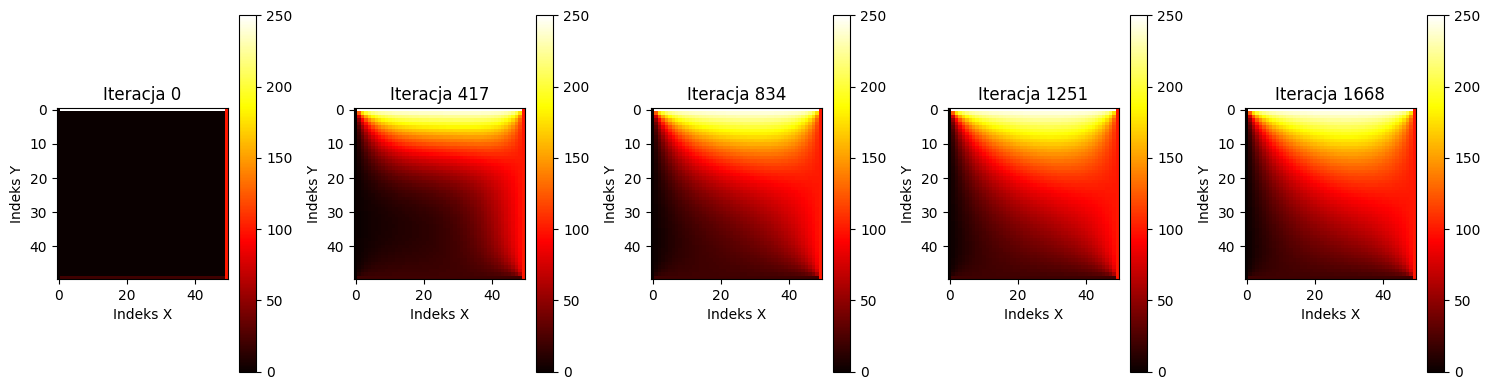

Liczba iteracji potrzebna do osiągnięcia stabilizacji: 1668


In [16]:
# Parametry testowe dla symulacji
Nx, Ny = 50, 50  # Siatka 50x50
TL, TP, TG, TD = 250, 20, 0, 100  # Warunki brzegowe
tolerance = 1e-2  # Kryterium zbieżności
max_iter = 10000  # Maksymalna liczba iteracji
kal = 237.0  # Stała przewodność cieplna

# Tworzenie macierzy przewodnictwa cieplnego (jednorodna)
k_values_2D = np.ones((Ny, Nx)) * kal

# Uruchomienie symulacji z paskiem postępu
print("Rozpoczynanie symulacji...")
temperatures, iterations_needed = simulate_heat_transfer_nonhomogeneous2D(
    Nx, Ny, TL, TP, TG, TD, k_values_2D, max_iter, tolerance
)

# Wizualizacja propagacji temperatury w wybranych iteracjach
snapshots = np.linspace(0, iterations_needed, 5, dtype=int)

fig, axes = plt.subplots(1, 5, figsize=(15, 4))
for idx, step in enumerate(snapshots):
    temp_snapshot, _ = simulate_heat_transfer_nonhomogeneous2D(
        Nx, Ny, TL, TP, TG, TD, k_values_2D, step, tolerance
    )  # Pobranie temperatury dla danej liczby iteracji

    im = axes[idx].imshow(temp_snapshot, cmap='hot', interpolation='nearest')
    axes[idx].set_title(f"Iteracja {step}")
    axes[idx].set_xlabel("Indeks X")
    axes[idx].set_ylabel("Indeks Y")
    plt.colorbar(im, ax=axes[idx])  # Teraz przekazujemy istniejący imshow() do colorbar()

plt.tight_layout()
plt.show()

# Wyświetlenie liczby iteracji do stabilizacji
print(f"Liczba iteracji potrzebna do osiągnięcia stabilizacji: {iterations_needed}")


Cała siatka zaczyna z wartościami początkowymi (zimna w środku, ciepłe brzegi).
Widoczne są duże różnice temperatur między brzegami a wnętrzem.


Początkowa propagacja ciepła (Iteracja ~400):

Ciepło zaczyna się rozprzestrzeniać od krawędzi do wnętrza.
Powstają wyraźne gradienty temperatury.


Średnie iteracje (Iteracja ~800-1200):

Ciepło równomiernie roznosi się w głąb siatki.
Gradienty temperatury zmniejszają się, ale różnice są jeszcze widoczne.


Końcowe iteracje (Iteracja ~1600):

Temperatura w całej siatce zaczyna się stabilizować.
Różnice temperatur w poszczególnych obszarach maleją.
System osiąga stan ustalony po 1668 iteracjach.

Zadanie 10

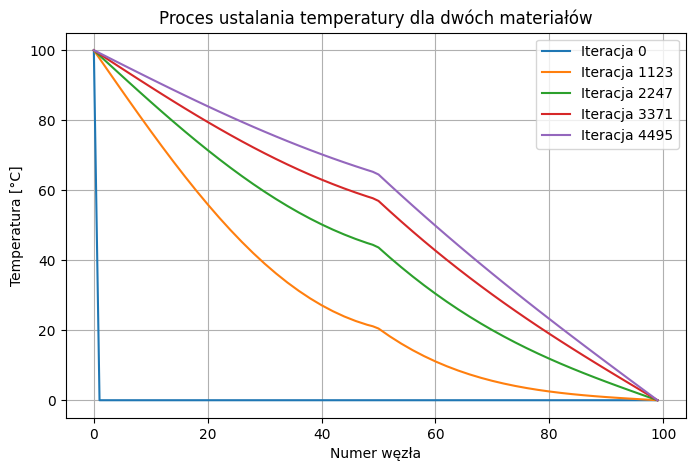

Liczba iteracji potrzebna do osiągnięcia stabilizacji: 4495


In [17]:

# Parametry symulacji
N = 100  # Liczba węzłów siatki
T0, TN = 100, 0  # Warunki brzegowe
k1, k2 = 0.3, 0.1  # Współczynniki przewodności cieplnej dla dwóch materiałów
max_iter = 5000  # Maksymalna liczba iteracji
tolerance = 0.01  # Kryterium zbieżności

# Tworzenie macierzy współczynnika przewodnictwa cieplnego (lewa połowa k1, prawa k2)
k_values = np.ones(N)
k_values[:N//2] = k1
k_values[N//2:] = k2

# Przeprowadzenie symulacji
temperatures, iterations_needed = simulate_heat_transfer_nonhomogeneous1D(N, T0, TN, k_values, max_iter, tolerance)

# Określenie momentów iteracyjnych do wizualizacji
snapshots = np.linspace(0, iterations_needed, 5, dtype=int)

# Wizualizacja propagacji temperatury w czasie
plt.figure(figsize=(8, 5))
for step in snapshots:
    temp_snapshot, _ = simulate_heat_transfer_nonhomogeneous1D(N, T0, TN, k_values, step, tolerance)
    plt.plot(range(N), temp_snapshot, label=f"Iteracja {step}")

plt.xlabel("Numer węzła")
plt.ylabel("Temperatura [°C]")
plt.title("Proces ustalania temperatury dla dwóch materiałów")
plt.legend()
plt.grid(True)
plt.show()

# Wyświetlenie liczby iteracji do stabilizacji
print(f"Liczba iteracji potrzebna do osiągnięcia stabilizacji: {iterations_needed}")


W porównaniu do przypadku jednorodnego, różnice we współczynniku przewodnictwa cieplnego powodują nierównomierne rozprzestrzenianie się ciepła.
Część pręta z większym k1 szybciej wyrównuje temperaturę niż ta z k2.

Na wykresach widać, że punkt podziału materiałów tworzy "załamanie" w krzywej temperatury.
Wynika to z faktu, że ciepło rozprzestrzenia się szybciej w materiale o większym k.


Układ dwumateriałowy osiągnął stan ustalony po 4495 iteracjach, co jest większą liczbą niż w przypadku jednorodnym.
Wolniejsze rozchodzenie się ciepła w części o niższym k2 powoduje, że cały system potrzebuje więcej czasu na ustabilizowanie temperatury.


Zadanie 11

Rozpoczynam symulację dla k1=0.05, k2=0.1...


Symulacja postępuje:  28%|██▊       | 2831/10000 [00:12<00:31, 228.97iter/s]


Rozpoczynam symulację dla k1=0.1, k2=0.1...


Symulacja postępuje:  28%|██▊       | 2786/10000 [00:11<00:30, 232.83iter/s]


Rozpoczynam symulację dla k1=0.2, k2=0.1...


Symulacja postępuje:  27%|██▋       | 2744/10000 [00:11<00:30, 237.96iter/s]


Rozpoczynam symulację dla k1=0.3, k2=0.1...


Symulacja postępuje:  27%|██▋       | 2721/10000 [00:11<00:30, 238.30iter/s]


Rozpoczynam symulację dla k1=0.5, k2=0.1...


Symulacja postępuje:  27%|██▋       | 2697/10000 [00:11<00:30, 236.75iter/s]


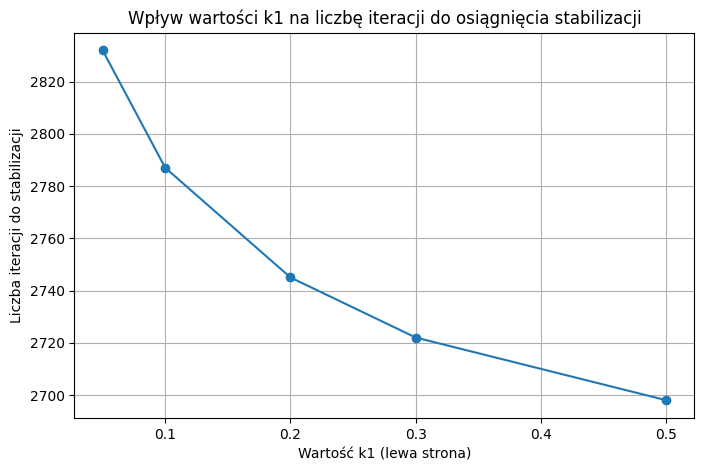

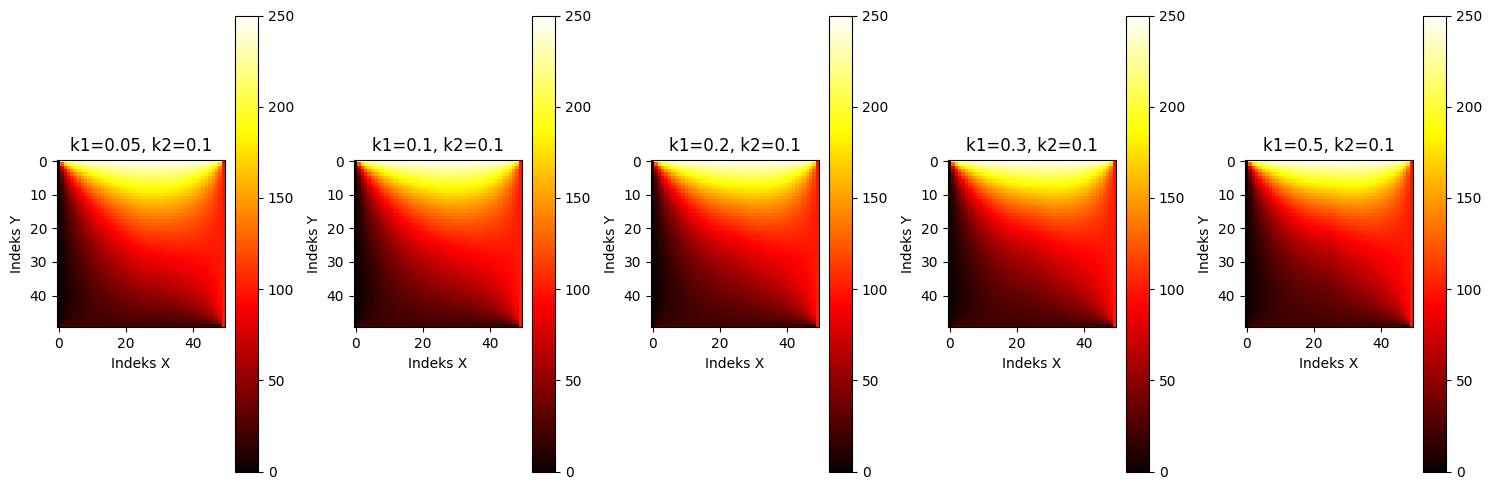


Tabela wyników wpływu współczynnika k na liczbę iteracji:
 Wartość k1  Liczba iteracji
       0.05             2832
       0.10             2787
       0.20             2745
       0.30             2722
       0.50             2698


In [21]:
# Lista wartości współczynnika k do testowania
k_values_test = [0.05, 0.1, 0.2, 0.3, 0.5]
iterations_results = []

# Przechowywanie wyników temperatur dla różnych wartości k
temperature_results = {}

# Testowanie różnych wartości k w układzie niejednorodnym
for k_test in k_values_test:
    # Tworzenie siatki przewodnictwa cieplnego (połowa materiału z k_test, druga połowa z 0.1)
    k_variable = np.ones((Ny, Nx))
    k_variable[:, :Nx//2] = k_test  # Lewa strona zmienne k
    k_variable[:, Nx//2:] = 0.1  # Prawa strona stałe k = 0.1

    print(f"Rozpoczynam symulację dla k1={k_test}, k2=0.1...")
    temperatures, iterations_needed = simulate_heat_transfer_nonhomogeneous2D(
        Nx, Ny, TL, TP, TG, TD, k_variable, max_iter, tolerance
    )
    
    iterations_results.append((k_test, iterations_needed))
    temperature_results[k_test] = temperatures

# Wizualizacja zależności liczby iteracji od wartości k
k_values, iteration_counts = zip(*iterations_results)

plt.figure(figsize=(8, 5))
plt.plot(k_values, iteration_counts, marker='o', linestyle='-')
plt.xlabel("Wartość k1 (lewa strona)")
plt.ylabel("Liczba iteracji do stabilizacji")
plt.title("Wpływ wartości k1 na liczbę iteracji do osiągnięcia stabilizacji")
plt.grid(True)
plt.show()

# Wizualizacja rozkładu temperatury dla różnych wartości k1
fig, axes = plt.subplots(1, len(k_values_test), figsize=(15, 5))

for idx, k_test in enumerate(k_values_test):
    im = axes[idx].imshow(temperature_results[k_test], cmap='hot', interpolation='nearest')
    axes[idx].set_title(f"k1={k_test}, k2=0.1")
    axes[idx].set_xlabel("Indeks X")
    axes[idx].set_ylabel("Indeks Y")
    plt.colorbar(im, ax=axes[idx])

plt.tight_layout()
plt.show()

# Wyświetlenie wyników w formie tabelarycznej
df_results = pd.DataFrame(iterations_results, columns=["Wartość k1", "Liczba iteracji"])

print("\nTabela wyników wpływu współczynnika k na liczbę iteracji:")
print(df_results.to_string(index=False))


Wzrost wartości k1 powoduje spadek liczby iteracji wymaganych do osiągnięcia stanu ustalonego. Gdy k1 wzrasta, przewodnictwo cieplne w lewej części materiału rośnie, co przyspiesza wymianę ciepła i skraca czas stabilizacji.

Mniejsza liczba iteracji oznacza krótszy czas obliczeń. Wysokie wartości k1 przyspieszają propagację ciepła, zmniejszając liczbę wymaganych iteracji do osiągnięcia stabilizacji. Jednak bardzo niskie wartości k1 spowalniają wymianę ciepła, zwiększając liczbę iteracji i wydłużając czas symulacji.